
 ## **Predicting A Tennis Match Outcome Based On Player Rank Points, Rank and Number Of Aces.**
 
### **Introduction** 
    The Association of Tennis Professionals (ATP) uses a computer ranking system to determine who can enter their tournaments and provide an unbiased analysis of the performance of the tennis players.The tennis match data was originally collected by the Association of Tennis Professionals, the datasets we will be using were compiled by Jeff Sackmann based on the original data. The data includes the stats from all the ATP matches, we will only be using the data from 2013-2023. Our project will be answering the question of how  a tennis player's rank points, rank, and number of aces affect their likelihood of winning a tennis match. Our main argument is that we believe that a tennis player will be more likely to win a match if they have higher rank points, a higher rank, and more aces than their competitor because their rank points and rank were calculated based on their performance in previous matches, so a higher rank likely means that they have performed better in a game.  

(A note to the grader that the TA Eros gave us code for this proposal to help separate the data so there is a categorical variable in our dataset. He used a for loop to execute this and it takes **3-4 minutes to run**.)  

In [2]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [3]:
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2014.csv', "data/data2014.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2015.csv', "data/data2015.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2016.csv', "data/data2016.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv', "data/data2017.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv', "data/data2018.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2019.csv', "data/data2019.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2020.csv', "data/data2020.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2021.csv', "data/data2021.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2022.csv', "data/data2022.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2023.csv', "data/data2023.csv")

In [4]:
data2014<- read_csv("data/data2014.csv")
data2015<- read_csv("data/data2015.csv")
data2016<- read_csv("data/data2016.csv")
data2017<- read_csv("data/data2017.csv")
data2018<- read_csv("data/data2018.csv")
data2019<- read_csv("data/data2019.csv")
data2020<- read_csv("data/data2020.csv")
data2021<- read_csv("data/data2021.csv")
data2022<- read_csv("data/data2022.csv")
data2023<- read_csv("data/data2023.csv")

Rows: 2901 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2943 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2941 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tou

However, our data set isn't tidy because the categorical factor of "win" or "loss" is integrated into every column. We first must combine the columns and extract the "win" or "loss" factor into a new column. 


In [5]:
gigadata <- rbind(data2014, data2015, data2016, data2017, data2018, data2019, data2020, data2021, data2022, data2023) 


selected_gigadata<- select(gigadata, w_ace, l_ace, winner_rank_points, loser_rank_points, loser_rank, winner_rank)



w_ace,l_ace,winner_rank_points,loser_rank_points,loser_rank,winner_rank
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,9,1090,425,136,39
11,14,774,1160,35,61
18,4,960,1244,29,46
23,5,307,549,100,172
15,13,918,697,70,50
10,4,1175,784,59,34
13,4,1310,721,67,28
4,8,780,41,628,60
31,4,369,310,170,147


In [6]:
new_data <- data.frame(status = character(), ace = numeric(), rank_points = numeric(), rank = numeric())
for(i in 1:nrow(selected_gigadata)) {
    row <- selected_gigadata[i,]
    new_data[nrow(new_data) + 1,] = c("Win", pull(row["w_ace"]), pull(row["winner_rank_points"]), pull(row["winner_rank"]))
    new_data[nrow(new_data) + 1,] = c("Loss", pull(row["l_ace"]), pull(row["loser_rank_points"]), pull(row["loser_rank"]))
} 





In [7]:
tennis_split <- initial_split(new_data, prop = 0.75, strata = status)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split) 

In [8]:
head(tennis_train)
nrow(tennis_train)

,status,ace,rank_points,rank
,<chr>,<chr>,<chr>,<chr>
2,Loss,9,425,136
8,Loss,5,549,100
10,Loss,13,697,70
14,Loss,4,721,67
18,Loss,4,310,170
20,Loss,2,977,43


[1] 40320

In [11]:
rank_points_double<- mutate(tennis_train, rank_points= as.numeric(rank_points))
double_graph<- mutate(rank_points_double, rank= as.numeric(rank))
double_graph<- mutate(double_graph, ace= as.numeric(ace))
head(double_graph)

,status,ace,rank_points,rank
,<chr>,<dbl>,<dbl>,<dbl>
2,Loss,9,425,136
8,Loss,5,549,100
10,Loss,13,697,70
14,Loss,4,721,67
18,Loss,4,310,170
20,Loss,2,977,43
26,Loss,1,1090,39
30,Loss,8,344,151
32,Loss,12,918,50


## **Preliminary exploratory data analysis**

    Our basic tables summarizes the average number of aces, rank points and ranking per the status of winning and losing a game. We can use these summary tables to visualize this in a simple bar graph. These visualization shows that the average number of aces and rank points are higher for winning games than losing. This tells us that using aces and rank points to predict a winning tennis game are good variables to use. However, we notice that average ranking of a player is higher for losing games rather than winning. Further, analysis needs to explored to see if those players that are higher ranked are more likely to win or lose. That being said, we will use ace, rank points, and player ranking as a predictor variable when creating our classification model. 
    


status,average_aces
<chr>,<dbl>
Loss,5.424914
Win,7.248711


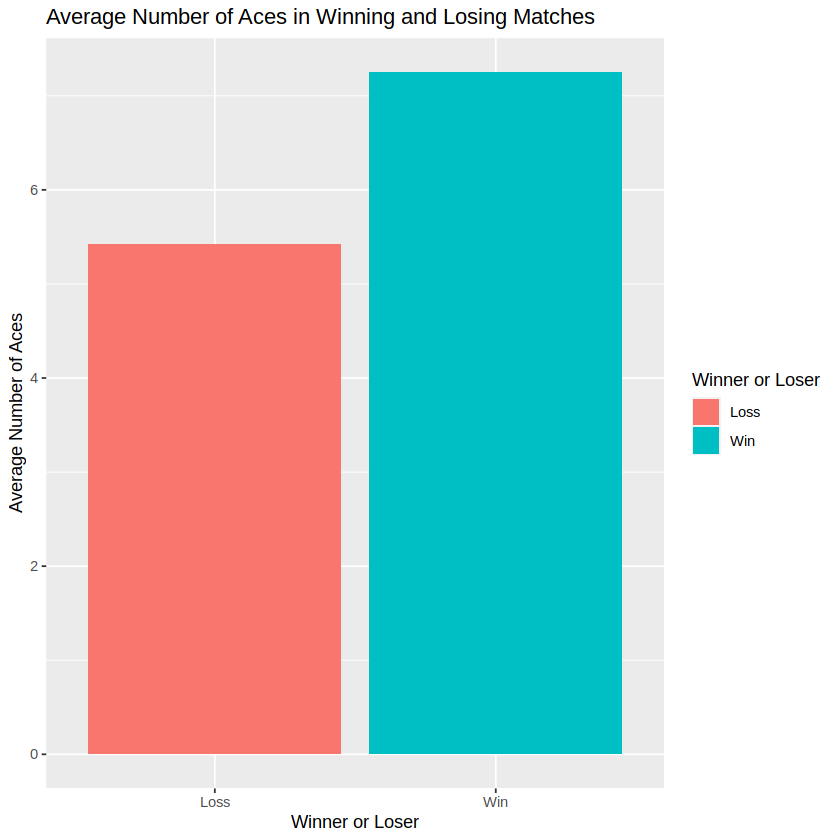

In [13]:
ace_tbl<- double_graph|> 
            group_by(status)|>
            summarize( average_aces = mean(ace, na.rm= TRUE))

ace_tbl

ace_bar<- ggplot(ace_tbl, aes(x= status, y = average_aces, fill=status)) + 
    geom_bar(stat="identity") +
    labs(x = "Winner or Loser", y = "Average Number of Aces", fill = "Winner or Loser") +
    ggtitle("Average Number of Aces in Winning and Losing Matches")

ace_bar



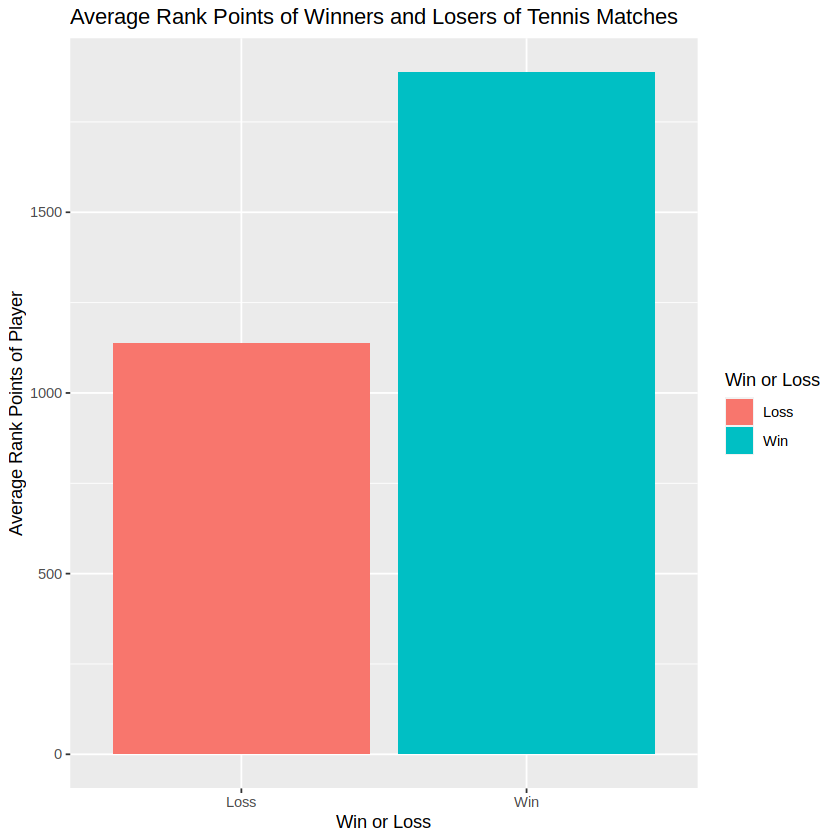

In [14]:
ranking_points_data <- double_graph|>
    group_by(status) |>
    summarize( average_rank_points = mean(rank_points, na.rm = TRUE))

ranking_points_data |> 

ggplot(aes(x=status, y =average_rank_points, fill = status)) + 
    geom_bar(stat="identity") + 
    labs(x = "Win or Loss", y = "Average Rank Points of Player", fill = "Win or Loss") + 
    ggtitle("Average Rank Points of Winners and Losers of Tennis Matches")

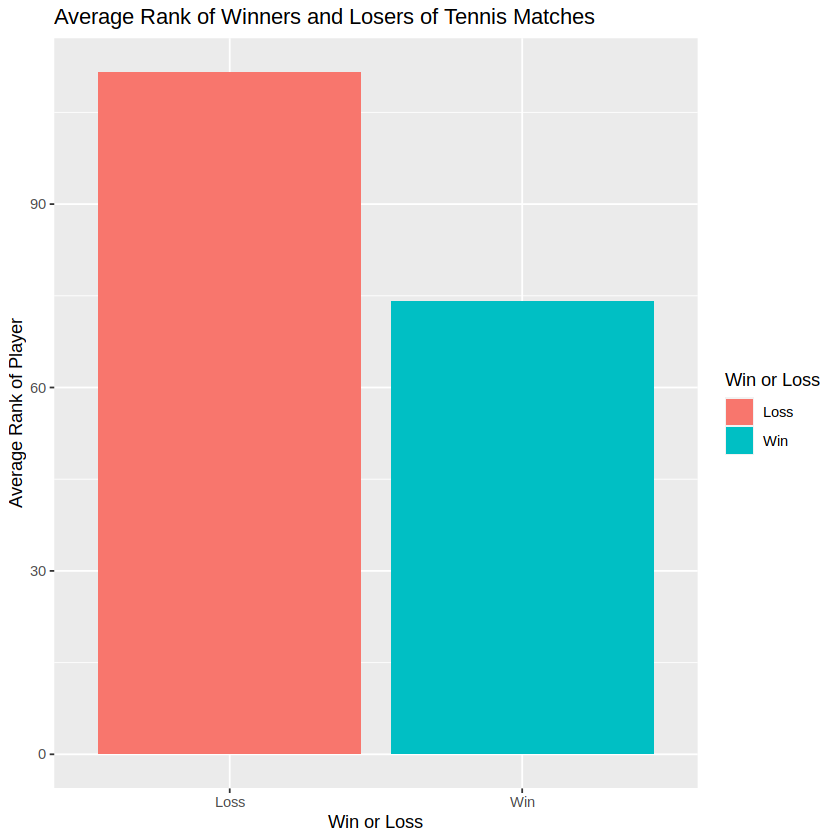

In [15]:
ranking_data <- double_graph|>
    group_by(status) |>
    summarize(average_rank = mean(rank, na.rm = TRUE))

ranking_data |> 
ggplot(aes(x=status, y =average_rank, fill = status)) + 
    geom_bar(stat="identity") + 
    labs(x = "Win or Loss", y = "Average Rank of Player", fill = "Win or Loss") + 
    ggtitle("Average Rank of Winners and Losers of Tennis Matches")

## **Methods** 

    We believe that a tennis player's rank points, rank, and number of aces will have an impact on a player's wins and losses. So after combining the data from previous years, we mainly choose aces, rank points and rank as explanatory variables. We also choose status as a response variable.
    
    In order to improve the accuracy of our classification, we decided to use knn classification model. We split the organized data into 75% training data and 25% testing data. This will randomly extract the data without the influence of sorting and stratify the data by status label so that status has the same proportion in the training and testing sets. Next we'll pre-process the data, making sure that our test data doesn't affect any aspect of the model training. We then can create our K-nearest neighbor classifier into the workflow to make our prediction of status. Finally, we will visualize the data by constructing a scatterplot and classify our values by the distance to the nearest neighbor and their status 



## **Expected outcomes and significance**

    We expect to find that certain predictors, such as aces, have a significant impact on the probability of winning. This could be because the players that are more likely to win tend to have more aces. Additionally, players that have higher rank points are more likely to win a game. This shows the importance that ranking has in predicting the outcome of a game
    
    Some of the potential outcomes could be that tennis organizations and coaches could use this classification model to see if these predictors are useful to tell if certain players will have a higher success rate and win more games. Furthermore, the players themselves could use this data for self improvement. What we mean by this is that if the model shows that a higher amount of aces leads to more wins then the player will spend more time trying to increase their aces. 
    
    A question could be if a player's age affects the relationship between aces, rankings, and rank points and their performance? Do these predictors have different effects on players when they are younger vs older? Therefore, age is an important variable that could be useful in our model.

    